In [10]:
import ROOT
from itertools import product
from array import array
from math import pow, sqrt

In [11]:
f = ROOT.TFile.Open("../results/2017/fakerate_muon.root")

#ptcorr_bins = [10., 15., 20., 25., 35., 50., 70., 100.]   # 20, 35
#abseta_bins = [0., 0.8, 1.579, 2.5]

ptcorr_bins = [10., 15., 20., 30., 50., 70., 100.]        # 30
abseta_bins = [0., 0.9, 1.6, 2.4]

In [12]:
# estimate error bin by bin
# and add up the histograms
# muon
# systematics: Central, PromptNormUp, PromptNormDown, MotherJetPtUp, MotherJetPtDown, RequireHeavyTag
fakerate = ROOT.TH2D("fakerate_muon", "", len(abseta_bins)-1, array('d', abseta_bins), len(ptcorr_bins)-1, array('d', ptcorr_bins))

for abseta, ptcorr in product(abseta_bins[:-1], ptcorr_bins[:-1]):
    suffix = "Mu8" if ptcorr < 30. else "Mu17"
    h = f.Get(f"fakerate_MeasFake{suffix}_Central");   
    h_prUp = f.Get(f"fakerate_MeasFake{suffix}_PromptNormUp")
    h_prDown = f.Get(f"fakerate_MeasFake{suffix}_PromptNormDown")
    h_jetup = f.Get(f"fakerate_MeasFake{suffix}_MotherJetPtUp")
    h_jetdown = f.Get(f"fakerate_MeasFake{suffix}_MotherJetPtDown") 
    h_btag = f.Get(f"fakerate_MeasFake{suffix}_RequireHeavyTag")
    h_qcd = f.Get(f"fakerate_MeasFake{suffix}_QCD")
    
    # get fake values
    thisbin = h.FindBin(abseta+1e-5, ptcorr+1e-5)
    thisContent = h.GetBinContent(thisbin) 
    err_pr = max(abs(h_jetup.GetBinContent(thisbin)-thisContent), abs(h_jetdown.GetBinContent(thisbin)-thisContent))
    err_jetpt = max(abs(h_prUp.GetBinContent(thisbin)-thisContent), abs(h_prDown.GetBinContent(thisbin)-thisContent))
    err_heavytag = abs(h_btag.GetBinContent(thisbin)-thisContent)
    err_qcd = abs(h_qcd.GetBinContent(thisbin)-thisContent)
    totalUnc = sqrt(pow(err_pr, 2) + pow(err_jetpt, 2) + pow(err_heavytag, 2))
    if totalUnc > err_qcd: pass
    else:                  totalUnc = err_qcd
    #print(thisContent)
    #print(err_pr)
    #print(err_jetpt)
    #print(err_heavytag)
    #print(totalUnc)
    #break
    
    fakerate.SetBinContent(thisbin, thisContent)
    fakerate.SetBinError(thisbin, totalUnc)
    print(f"[{abseta}, {ptcorr}] total unc. = {totalUnc:.4f} ({totalUnc/thisContent*100:.2f})%")



[0.0, 10.0] total unc. = 0.0764 (21.07)%
[0.0, 15.0] total unc. = 0.0289 (15.06)%
[0.0, 20.0] total unc. = 0.0871 (69.38)%
[0.0, 30.0] total unc. = 0.0609 (98.42)%
[0.0, 50.0] total unc. = 0.3833 (869.30)%
[0.0, 70.0] total unc. = 13.0785 (15914.51)%
[0.9, 10.0] total unc. = 0.0139 (3.52)%
[0.9, 15.0] total unc. = 0.0502 (24.00)%
[0.9, 20.0] total unc. = 0.1188 (74.67)%
[0.9, 30.0] total unc. = 0.0669 (75.01)%
[0.9, 50.0] total unc. = 0.4376 (605.34)%
[0.9, 70.0] total unc. = 5.6352 (4841.06)%
[1.6, 10.0] total unc. = 0.0182 (4.15)%
[1.6, 15.0] total unc. = 0.0895 (34.66)%
[1.6, 20.0] total unc. = 0.0310 (15.37)%
[1.6, 30.0] total unc. = 0.0733 (54.91)%
[1.6, 50.0] total unc. = 0.4983 (386.36)%
[1.6, 70.0] total unc. = 3.5284 (1752.27)%


In [13]:
# prepare canvas and legend
c = ROOT.TCanvas("c", "", 720, 800)
pad_up = ROOT.TPad("pad_up", "", 0, 0.25, 1, 1)
pad_up.SetBottomMargin(0.02)
pad_down = ROOT.TPad("pad_down", "", 0, 0, 1, 0.25)
pad_down.SetTopMargin(0.08)
pad_down.SetBottomMargin(0.3)
pad_down.SetGrid()
legend = ROOT.TLegend(0.65, 0.50, 0.9, 0.87)
legend.SetFillStyle(0)
legend.SetBorderSize(0)

info = ROOT.TLatex()
info.SetTextSize(0.035)
info.SetTextFont(42)
logo = ROOT.TLatex()
logo.SetTextSize(0.04)
logo.SetTextFont(61)
extra_logo = ROOT.TLatex()
extra_logo.SetTextSize(0.035)
extra_logo.SetTextFont(52)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


In [14]:
h = fakerate; h.SetDirectory(0)
projections = {}
projections["eta1"] = h.ProjectionY(f"eta{str(abseta_bins[0])}to{str(abseta_bins[1])}", 1, 1)
projections["eta2"] = h.ProjectionY(f"eta{str(abseta_bins[1])}to{str(abseta_bins[2])}", 2, 2)
projections["eta3"] = h.ProjectionY(f"eta{str(abseta_bins[2])}to{str(abseta_bins[3])}", 3, 3)

projections["eta1"].SetLineColor(ROOT.kRed)
projections["eta2"].SetLineColor(ROOT.kGreen)
projections["eta3"].SetLineColor(ROOT.kBlue)

legend.AddEntry(projections["eta1"], f"{abseta_bins[0]} < |#eta| < {abseta_bins[1]}", "lep")
legend.AddEntry(projections["eta2"], f"{abseta_bins[1]} < |#eta| < {abseta_bins[2]}", "lep")
legend.AddEntry(projections["eta3"], f"{abseta_bins[2]} < |#eta| < {abseta_bins[3]}", "lep")

ratios = {}
ratios['eta1'] = projections['eta1'].Clone("ratio1")
ratios['eta2'] = projections['eta2'].Clone("ratio2")
ratios['eta3'] = projections['eta3'].Clone("ratio3")

for bin in range(1, ratios['eta1'].GetNbinsX()+1):
    content = ratios['eta1'].GetBinError(bin)/ratios['eta1'].GetBinContent(bin)
    ratios['eta1'].SetBinContent(bin, content)
    ratios['eta1'].SetBinError(bin, 0)
    ratios['eta1'].SetMarkerColor(2)
for bin in range(1, ratios['eta2'].GetNbinsX()+1):
    content = ratios['eta2'].GetBinError(bin)/ratios['eta2'].GetBinContent(bin)
    ratios['eta2'].SetBinContent(bin, content)
    ratios['eta2'].SetBinError(bin, 0)
    ratios['eta3'].SetMarkerColor(3)
for bin in range(1, ratios['eta3'].GetNbinsX()+1):
    content = ratios['eta3'].GetBinError(bin)/ratios['eta3'].GetBinContent(bin)
    ratios['eta3'].SetBinContent(bin, content)
    ratios['eta3'].SetBinError(bin, 0)
    ratios['eta3'].SetMarkerColor(4)

for hist in projections.values():
    hist.SetTitle("")
    hist.SetStats(0)
    hist.SetLineWidth(2)
    hist.GetXaxis().SetLabelSize(0)
    hist.GetXaxis().SetTitle("p_{T}^{corr}")
    hist.GetXaxis().SetRangeUser(10., 50.)
    hist.GetYaxis().SetRangeUser(0., 1.) 
    hist.GetYaxis().SetTitle("fake rate (#mu)")
    
for hist in ratios.values():
    hist.SetStats(0)
    hist.SetTitle("")
    hist.GetXaxis().SetTitle("p_{T}^{corr}")
    hist.GetXaxis().SetRangeUser(10., 50.)
    hist.GetXaxis().SetTitleSize(0.1)
    hist.GetXaxis().SetTitleOffset(0.8)
    hist.GetXaxis().SetLabelSize(0.08)
    hist.GetYaxis().SetRangeUser(0., 1.)
    hist.GetYaxis().SetTitle("#Delta fr/fr")
    hist.GetYaxis().CenterTitle()
    hist.GetYaxis().SetTitleSize(0.1)
    hist.GetYaxis().SetTitleOffset(0.4)
    hist.GetYaxis().SetLabelSize(0.08)
    hist.SetMarkerStyle(8)
    hist.SetMarkerSize(0.7)

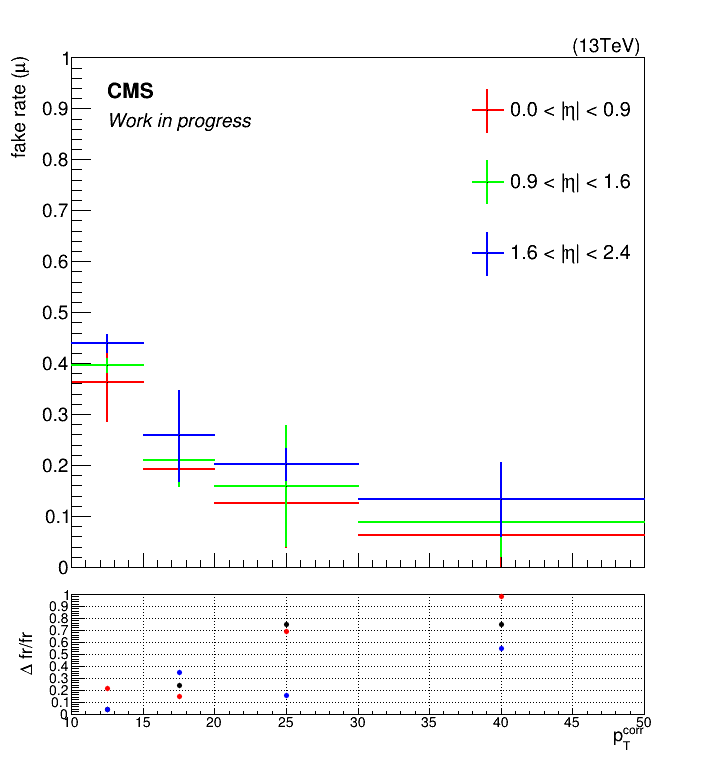

In [15]:
pad_up.cd()
projections["eta1"].Draw()
projections["eta2"].Draw("same")
projections["eta3"].Draw("same")
legend.Draw("same")
info.DrawLatexNDC(0.80, 0.91, "(13TeV)")
logo.DrawLatexNDC(0.15, 0.83, "CMS")
extra_logo.DrawLatexNDC(0.15, 0.78, "Work in progress")
pad_down.cd()
#ratios["eta1"].Draw("L")
ratios["eta1"].Draw("P")
ratios["eta2"].Draw("same&P")
ratios["eta3"].Draw("same&P")
c.cd()
pad_up.Draw()
pad_down.Draw()
c.Draw()